In [6]:
import pandas as pd

from plv.data import load_verbraucherpreisindex
from plv.plot import plot_ts

# Load

In [7]:
data = load_verbraucherpreisindex(filter_columns=None)
data = data[data["inflation"].notna()].copy()

# Plot

In [10]:
# plot_ts(data["inflation"])

In [3]:
import matplotlib.pyplot as plt

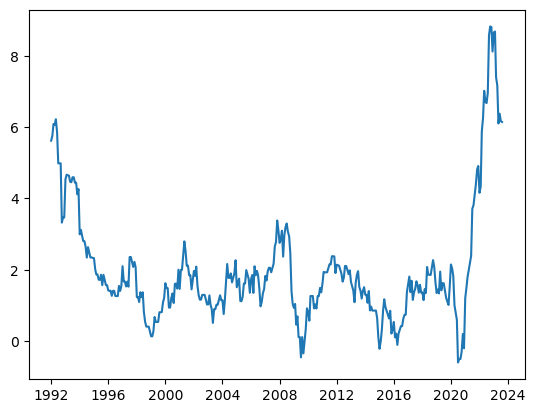

In [4]:
plt.plot(data.index, data["inflation"])

In [113]:
data["inflation"].tail(20)

dt
2022-01-01    4.158416
2022-02-01    4.330709
2022-03-01    5.876592
2022-04-01        6.25
2022-05-01    7.017544
2022-06-01    6.705539
2022-07-01    6.673114
2022-08-01    6.956522
2022-09-01    8.574181
2022-10-01    8.820709
2022-11-01    8.803828
2022-12-01    8.118434
2023-01-01     8.65019
2023-02-01    8.679245
2023-03-01    7.400555
2023-04-01    7.169118
2023-05-01    6.102004
2023-06-01    6.375228
2023-07-01    6.165005
2023-08-01    6.142728
Freq: MS, Name: inflation, dtype: Float64

# Investigate PACF

In [39]:
filter_ = slice("1995", "2020")

In [40]:
data.loc[filter_]

,Statistik_Code,Statistik_Label,Zeit_Code,Zeit_Label,Zeit,1_Merkmal_Code,1_Merkmal_Label,1_Auspraegung_Code,1_Auspraegung_Label,2_Merkmal_Code,2_Merkmal_Label,2_Auspraegung_Code,2_Auspraegung_Label,PREIS1__Verbraucherpreisindex__2020=100,PREIS1__CH0004,PREIS1__CH0005,vpi,inflation,monthly_Inflation
dt,,,,,,,,,,,,,,,,,,,
1996-01-01,61111,Verbraucherpreisindex für Deutschland,JAHR,Jahr,1996,DINSG,Deutschland insgesamt,DG,Deutschland,MONAT,Monate,MONAT01,Januar,71.4,"1,4","0,3",71.4,1.420455,0.280899
1996-02-01,61111,Verbraucherpreisindex für Deutschland,JAHR,Jahr,1996,DINSG,Deutschland insgesamt,DG,Deutschland,MONAT,Monate,MONAT02,Februar,71.8,"1,4","0,6",71.8,1.412429,0.560224
1996-03-01,61111,Verbraucherpreisindex für Deutschland,JAHR,Jahr,1996,DINSG,Deutschland insgesamt,DG,Deutschland,MONAT,Monate,MONAT03,März,71.8,"1,4",-,71.8,1.412429,0.0
1996-04-01,61111,Verbraucherpreisindex für Deutschland,JAHR,Jahr,1996,DINSG,Deutschland insgesamt,DG,Deutschland,MONAT,Monate,MONAT04,April,71.8,"1,3",-,71.8,1.269394,0.0
1996-05-01,61111,Verbraucherpreisindex für Deutschland,JAHR,Jahr,1996,DINSG,Deutschland insgesamt,DG,Deutschland,MONAT,Monate,MONAT05,Mai,71.9,"1,4","0,1",71.9,1.410437,0.139276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-01,61111,Verbraucherpreisindex für Deutschland,JAHR,Jahr,2020,DINSG,Deutschland insgesamt,DG,Deutschland,MONAT,Monate,MONAT08,August,99.7,"-0,5",-,99.7,-0.499002,0.0
2020-09-01,61111,Verbraucherpreisindex für Deutschland,JAHR,Jahr,2020,DINSG,Deutschland insgesamt,DG,Deutschland,MONAT,Monate,MONAT09,September,99.7,"-0,5",-,99.7,-0.499002,0.0
2020-10-01,61111,Verbraucherpreisindex für Deutschland,JAHR,Jahr,2020,DINSG,Deutschland insgesamt,DG,Deutschland,MONAT,Monate,MONAT10,Oktober,99.9,"-0,3","0,2",99.9,-0.299401,0.200602


In [41]:
y = data.loc[filter_, "inflation"]

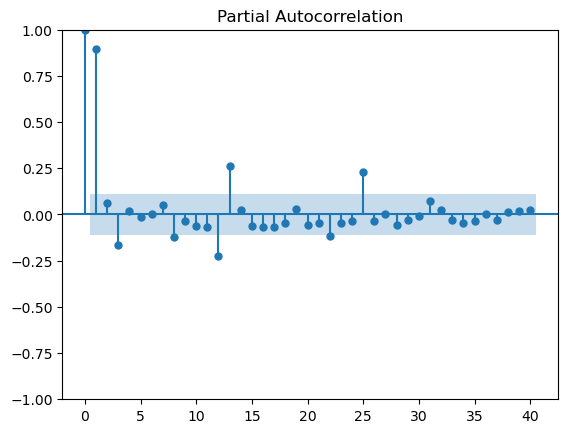

1     1.000000
2     0.900799
3     0.062090
4    -0.170082
5     0.018538
6    -0.012690
7     0.004763
8     0.057152
9    -0.127973
10   -0.038654
11   -0.066216
12   -0.075511
13   -0.240825
14    0.286118
15    0.029229
16   -0.076013
17   -0.076123
18   -0.072868
19   -0.054285
20    0.037677
21   -0.063093
22   -0.050849
23   -0.128284
24   -0.056049
25   -0.047304
dtype: float64

In [43]:
from statsmodels.tsa.stattools import pacf, acf
import statsmodels.api as sm
import matplotlib.pyplot as plt
y
sm.graphics.tsa.plot_pacf(y, lags=40, method="ywm")
plt.show()
p = pacf(y)
pd.Series(p, index=range(1, len(p) +1 ))

# ACF

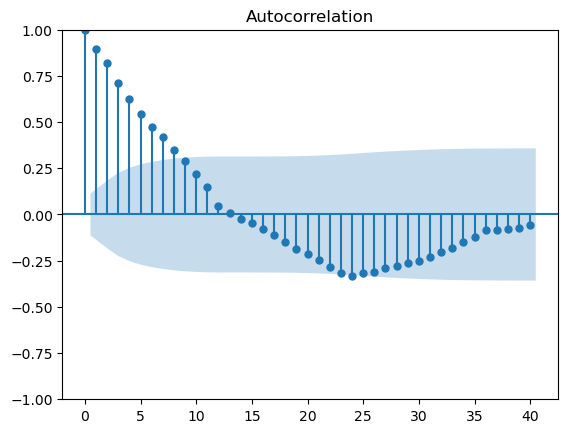

1     1.000000
2     0.897796
3     0.817659
4     0.712240
5     0.626523
6     0.542628
7     0.472758
8     0.419871
9     0.350767
10    0.289498
11    0.218212
12    0.147894
13    0.044124
14    0.009140
15   -0.026963
16   -0.048229
17   -0.079736
18   -0.112247
19   -0.147921
20   -0.185704
21   -0.215469
22   -0.245282
23   -0.283074
24   -0.317502
25   -0.330879
dtype: float64

In [45]:
sm.graphics.tsa.plot_acf(y, lags=40)
plt.show()
p = acf(y)
pd.Series(p, index=range(1, len(p) +1 ))

# Seasonality

In [55]:
import statsmodels.api as sm
def plot_seasonality(data: pd.Series, freq="MS"):
    "Seasonality plot of data"
    # this is necessary because otherwise sm.graphics.tsa.month_plot(y) throws an error
    # Turn the dtype Float64 of y into float64 
    index = pd.DatetimeIndex(data.index, freq=freq)
    y = pd.Series(index=index, data=data.to_numpy().astype(float))
    fig = sm.graphics.tsa.month_plot(y)
    return fig

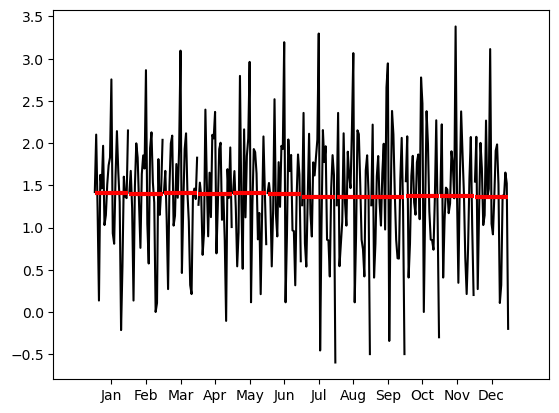

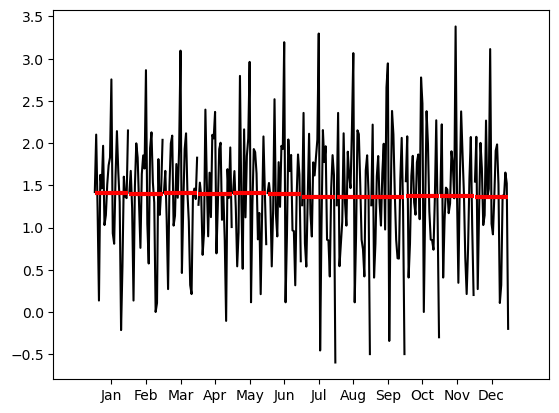

In [56]:
plot_seasonality(data.loc[slice(None, "2020"), "inflation"])

In [52]:
data.index

DatetimeIndex(['1996-01-01', '1996-02-01', '1996-03-01', '1996-04-01',
               '1996-05-01', '1996-06-01', '1996-07-01', '1996-08-01',
               '1996-09-01', '1996-10-01',
               ...
               '2022-11-01', '2022-12-01', '2023-01-01', '2023-02-01',
               '2023-03-01', '2023-04-01', '2023-05-01', '2023-06-01',
               '2023-07-01', '2023-08-01'],
              dtype='datetime64[ns]', name='dt', length=332, freq='MS')

matplotlib.figure.Figure

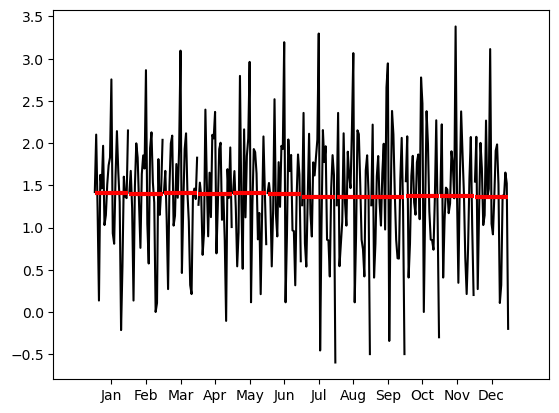

In [53]:
import statsmodels.api as sm

y = pd.Series(index=data.index, data=data["inflation"].to_numpy().astype(float))
y = y.loc[slice(None, "2020")]
fig = sm.graphics.tsa.month_plot(y)
type(fig)

## Example with seasonality

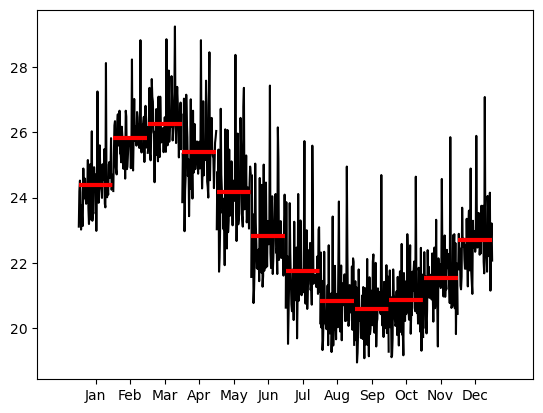

In [38]:
dta = sm.datasets.elnino.load_pandas().data
dta['YEAR'] = dta.YEAR.astype(int).astype(str)
dta = dta.set_index('YEAR').T.unstack()
dates = pd.to_datetime(list(map(lambda x: '-'.join(x) + '-1',
                                dta.index.values)))
dta.index = pd.DatetimeIndex(dates, freq='MS')
fig = sm.graphics.tsa.month_plot(dta)

# Zusammenhang Prozess und Daten

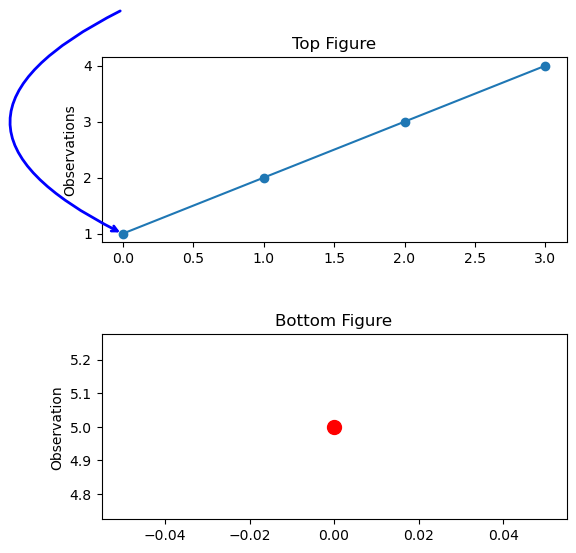

In [38]:
import matplotlib.pyplot as plt

# Sample data for four observations
top_data = [1, 2, 3, 4]
bottom_data = [5]

# Create a figure with two subplots (one on top, one on bottom)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 6))  # Adjust figsize as needed

# Plot the top subplot with four observations
ax1.plot(range(4), top_data, marker='o', linestyle='-')
ax1.set_title('Top Figure')
ax1.set_ylabel('Observations')

# Plot the bottom subplot with one observation
ax2.plot(0, bottom_data[0], marker='o', markersize=10, color='red')
ax2.set_title('Bottom Figure')
ax2.set_ylabel('Observation')

# Add an arrow connecting the first observation in the top subplot
arrowprops = dict(arrowstyle='->', connectionstyle='arc3,rad=1', lw=2, color='blue')
ax1.annotate('', xy=(0, top_data[0]), xytext=(0, bottom_data[0]), arrowprops=arrowprops)

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.5)

# Show the plot
plt.show()

# AR Simulation

## Using statsmodels -> cannot set initial value

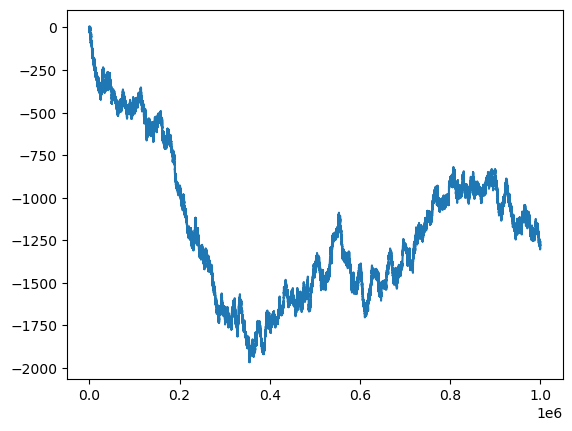

In [71]:
from statsmodels.tsa.arima_process import ArmaProcess, arma_generate_sample
import matplotlib.pyplot as plt

plt.plot(arma_generate_sample([1, -1], [1], 1000000))

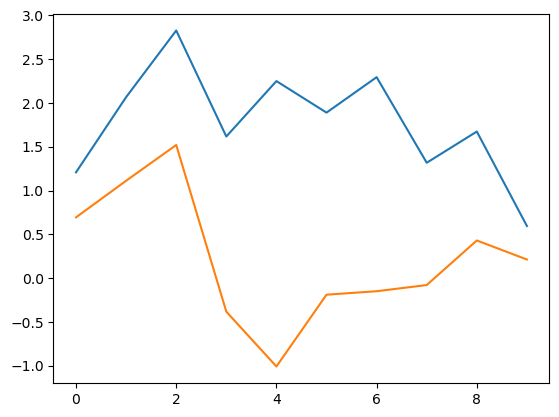

In [98]:
n = int(1e4)
n = 10
r = 2
plt.plot(arma_generate_sample([1, -0.9], [1], (n, r)));

## Manual

In [104]:
a = 0.9
exponents = np.arange(n)
a_vector = np.power(a, exponents)

mean = 0  # Mean of the normal distribution
std_dev = 1  # Standard deviation of the normal distribution
num_samples = 100  # Number of random samples to generate

# Generate random numbers from a normal distribution
U = np.random.normal(mean, std_dev, (n, r))
res = a_vector @ U

In [105]:
a_vector.T.shape

(10,)

In [106]:
res.shape

(2,)

In [109]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy import stats
from statsmodels.tsa.arima.model import ARIMA

In [111]:
dta = sm.datasets.sunspots.load_pandas().data
dta.index = pd.Index(sm.tsa.datetools.dates_from_range("1700", "2008"))
dta.index.freq = dta.index.inferred_freq
del dta["YEAR"]

# Widgets

In [117]:
import ipywidgets as widgets
from IPython.display import display

# Variable to be changed
my_variable = 0

# Create a slider widget
slider = widgets.FloatSlider(
    value=my_variable,
    min=0.0,
    max=100.0,
    step=1.0,
    description='Change My Variable:',
)

# Function to update the variable
def update_variable(change):
    my_variable = change.new
    print(f"Updated My Variable: {my_variable}")
    return my_variable

# Link the slider to the update function
slider.observe(update_variable, names='value')

# Display the slider
display(slider)

FloatSlider(value=0.0, description='Change My Variable:', step=1.0)

Updated My Variable: 1.0
Updated My Variable: 3.0
Updated My Variable: 5.0
Updated My Variable: 9.0
Updated My Variable: 12.0
Updated My Variable: 18.0
Updated My Variable: 21.0
Updated My Variable: 23.0


In [119]:
slider.observe?

In [118]:
my_variable

0

### display slider

In [167]:
import ipywidgets as widgets
from IPython.display import display

# Create a float slider
slider = widgets.FloatSlider(
    value=0.0,
    min=0.0,
    max=100.0,
    step=0.1,
    description='Value:',
)

# Display the slider
display(slider)

# Define an event handler for slider changes
def on_slider_change(change):
    print(f"Slider value: {change['new']}")

slider.observe(on_slider_change, names='value')

FloatSlider(value=0.0, description='Value:')

Slider value: 1.1
Slider value: 2.7
Slider value: 4.4
Slider value: 5.2
Slider value: 6.8


## interactive widgets
https://hub.ovh2.mybinder.org/user/jupyter-widgets-tutorial-8dpcylxk/lab/tree/notebooks/01.Introduction/01.00-introduction.ipynb

In [132]:
slider = widgets.FloatSlider(
    value=7.5,
    min=5.0,
    max=10.0,
    step=0.1,
    description='Input:',
)

b = widgets.FloatSlider(
    value=7.5,
    min=5.0,
    max=10.0,
    step=0.1,
    description='Input:',
)

slider

FloatSlider(value=7.5, description='Input:', max=10.0, min=5.0)

In [129]:
square = slider.value * slider.value

def handle_change(change):
    global square
    square = change.new
    
slider.observe(handle_change, 'value')

In [131]:
square

6.0

## interact

In [120]:
def f(x):
    print(x)
    
import ipywidgets as ipw

widgets.interact(f, x=(0, 100));

interactive(children=(IntSlider(value=50, description='x'), Output()), _dom_classes=('widget-interact',))

### interact with a plot
https://hub.ovh2.mybinder.org/user/jupyter-widgets-tutorial-8dpcylxk/lab/tree/notebooks/02.Widget_overview/01.Interact/01.00-Using-Interact.ipynb

In [2]:
# not optimal because figure is redrawn every time
import matplotlib.pyplot as plt
from ipywidgets import interact
import matplotlib.pyplot as plt
import numpy as np

def f(m, b):
    fig = plt.figure()
    plt.clf()
    plt.grid()
    x = np.linspace(-10, 10, num=1000)
    plt.plot(x, m * x + b)
    plt.ylim(-5, 5)
    plt.show()

interact(f, m=(-2.0, 2.0), b=(-3, 3, 0.5))

interactive(children=(FloatSlider(value=0.0, description='m', max=2.0, min=-2.0), FloatSlider(value=0.0, descr…

<function __main__.f(m, b)>

In [140]:
interact?

### ipympl and plain matplotlib

interactive(children=(FloatSlider(value=1.0, description='m', max=2.0, min=-2.0), FloatSlider(value=0.5, descr…

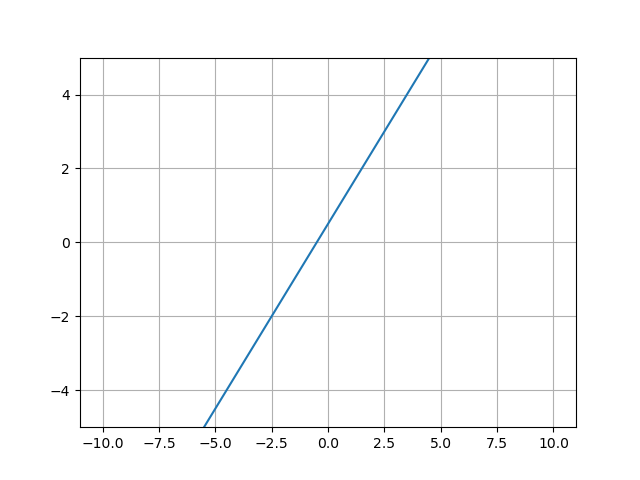

In [204]:
# Activate the widget based backend.
%matplotlib ipympl

class H:
    def __init__(self):
        x = np.linspace(-10, 10, num=1000)
        fig, ax = plt.subplots()
        ax.grid()
        ax.set_ylim(-5, 5)
        # Initialize a plot object with y = x. We'll be modifying y below.
        # This returns a list of `.Line2D` representing the plotted data. We grab the first one -- we only have 1 series.
        line = ax.plot(x, x)[0]

        @interact(m=(-2.0, 2.0), b=(-3, 3, 0.5))
        def update_line(m=1, b=0.5):
            line.set_ydata(m * x + b)
            # Request a widget redraw.
            fig.canvas.draw_idle()
        
H()

interactive(children=(FloatSlider(value=1.0, description='m', max=2.0, min=-2.0), FloatSlider(value=0.5, descr…

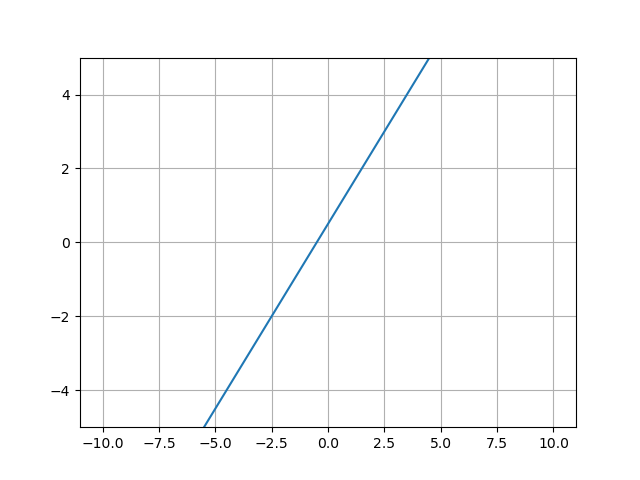

In [198]:
# Activate the widget based backend.
%matplotlib ipympl

x = np.linspace(-10, 10, num=1000)
fig, ax = plt.subplots()
ax.grid()
ax.set_ylim(-5, 5)
# Initialize a plot object with y = x. We'll be modifying y below.
# This returns a list of `.Line2D` representing the plotted data. We grab the first one -- we only have 1 series.
line = ax.plot(x, x)[0]

@interact(m=(-2.0, 2.0), b=(-3, 3, 0.5))
def update_line(m=1, b=0.5):
    line.set_ydata(m * x + b)
    # Request a widget redraw.
    fig.canvas.draw_idle()

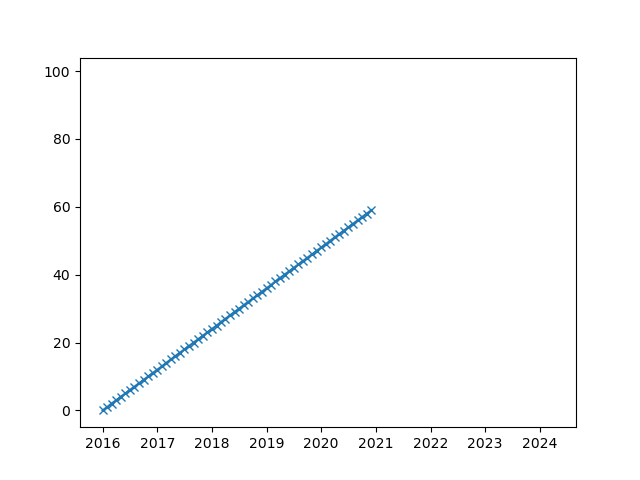

In [131]:
import matplotlib.pyplot as plt
import numpy as np

dates = pd.Series(
    range(0, n),
    index=pd.date_range("2016", periods=n, freq="MS")
)

# Create initial data
x = np.linspace(0, 2 * np.pi, 100)
y = np.sin(x)
    
x = dates.index
y = dates.to_numpy()

# Create the initial plot
fig, ax = plt.subplots()
line, = ax.plot(x, y, marker="x")

# Update the data and redraw the plot
new_y = dates.loc[:"2020"].to_numpy()
new_x = dates.loc[:"2020"].index
update_plot(new_x, new_y)

# Show the updated plot
plt.show()

In [171]:
line.set_data?

In [168]:
type(line)

matplotlib.lines.Line2D

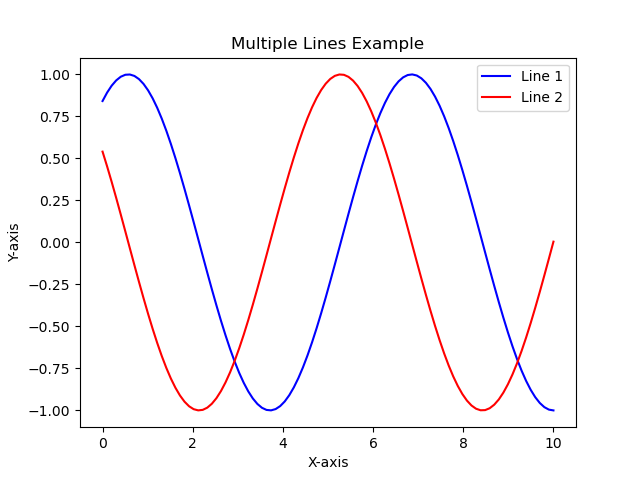

In [209]:
# two lines
import matplotlib.pyplot as plt
import numpy as np

# Create some data
x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the initial data
line1, = ax.plot(x, y1, label='Line 1', color='blue')
line2, = ax.plot(x, y2, label='Line 2', color='red')

# Set other plot properties
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('Multiple Lines Example')

# Add a legend
ax.legend()

# Function to update the data of multiple lines
def update_lines():
    new_y1 = np.sin(x + 1)  # New data for Line 1
    new_y2 = np.cos(x + 1)  # New data for Line 2

    # Update the data of the lines using set_data
    line1.set_data(x, new_y1)
    line2.set_data(x, new_y2)

    # Redraw the canvas to reflect the changes
    fig.canvas.draw()

# Update the lines with new data
update_lines()

# Show the plot
plt.show()


interactive(children=(IntSlider(value=2016, description='Jahr', max=2024, min=2016, step=2), IntSlider(value=6…

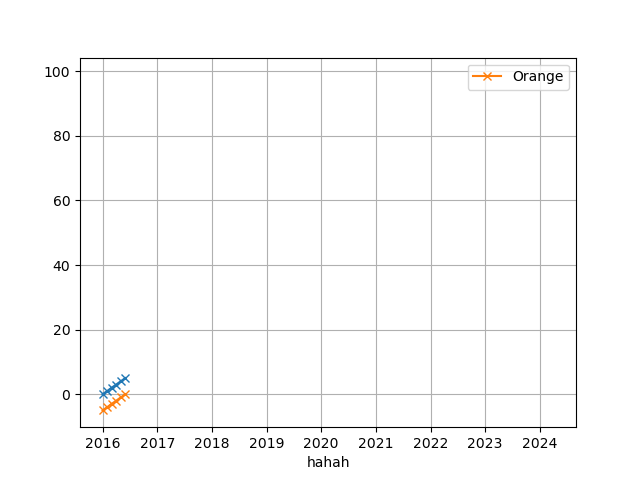

In [58]:
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets

n = 100

dates = pd.Series(
    range(0, n),
    index=pd.date_range("2016", periods=n, freq="MS")
)

# Create initial data
    
x = dates.index
y = dates.to_numpy()

# Create the initial plot
fig, ax = plt.subplots()
line, = ax.plot(x, y, marker="x")
line2, = ax.plot(x, y - 5, marker="x", label="Orange")
ax.set_xlabel("hahah")
ax.legend()
ax.grid()

year_widget = widgets.IntSlider(min=2016, max=2024, step=2)


dummy_widget = widgets.Dropdown(
    options={'AR(1)': False, 'AR(1) mit Krisen Dummy': True},
    value=False,
    description='Modell:',
)

mean_widget = widgets.Dropdown(
    options={'Ja': True, 'Nein': False},
    value=False,
    description='Zeichne den Erwartungswert des AR(1) Modells',
)

max_year_widget = widgets.IntSlider(min=2016, max=2024, step=2)

# Function to update the plot data
@interact(Jahr=year_widget, Monat=(1, 12), Dummy=dummy_widget, plot_mean=mean_widget)
def update_plot(Jahr, Monat, Dummy, plot_mean):
    new_y = dates.loc[:f"{Jahr}-{Monat}"].to_numpy()
    new_x = dates.loc[:f"{Jahr}-{Monat}"].index
    if Dummy:
        new_y = new_y + 10
    line.set_data(new_x, new_y)
    line2.set_data(new_x, new_y -5)
    fig.canvas.draw()


interactive(children=(FloatSlider(value=1.0, description='m', max=2.0, min=-2.0), FloatSlider(value=0.5, descr…

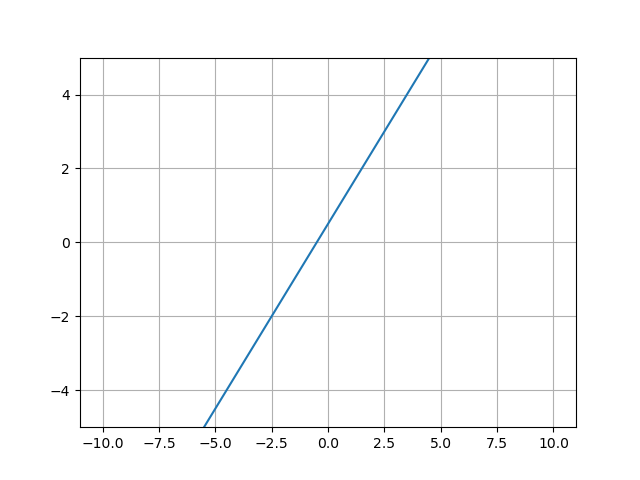

In [130]:
# Activate the widget based backend.
%matplotlib ipympl

x = np.linspace(-10, 10, num=1000)
fig, ax = plt.subplots()
ax.grid()
ax.set_ylim(-5, 5)
# Initialize a plot object with y = x. We'll be modifying y below.
# This returns a list of `.Line2D` representing the plotted data. We grab the first one -- we only have 1 series.
line = ax.plot(x, x)[0]

@interact(m=(-2.0, 2.0), b=(-3, 3, 0.5))
def update_line(m=1, b=0.5):
    line.set_ydata(m * x + b)
    # Request a widget redraw.
    fig.canvas.draw_idle()

### mpl interactions -> does only work with specific version
Have to plot numerical values on the x-axis, no datetime

In [35]:
iplt.plot?

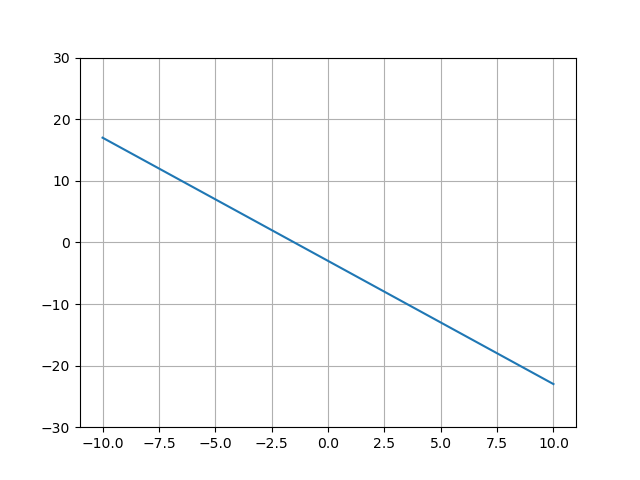

In [88]:
%matplotlib ipympl

from mpl_interactions import ipyplot as iplt

fig, ax = plt.subplots()
ax.grid()
ax.set_ylim(-30,30)

# Define function in a way you can re-use in calculations
def f(x, m, b):
    return m * x + b

x = np.linspace(-10, 10, num=1000)
ctrls = iplt.plot(x, f, m=(-2,2), b=(-3, 3, 10), slider_formats="{:.4f}")


In [98]:

n = 100
import pandas as pd
dates = pd.Series(
    range(0, n),
    index=pd.date_range("2016", periods=n, freq="MS"))

x = dates.index.strftime("%Y.%m").astype(float)

def f(Jahr: int, Monat: int):
    date_end = f"{Jahr}.{Monat}"
    out = pd.Series(0, index=dates_index)
    return out.loc[:date_end]

def f(x, Jahr):
    return x * Jahr

year = widgets.IntSlider(
    value=2018,
    min=2016,
    max=2023,
    step=1,
    description='Jahr:',
    # disabled=False,
    # continuous_update=False,
    orientation='horizontal',
    # readout=True,
    # slider_color='black'
)

month = widgets.IntSlider(
    value=1,
    min=1,
    max=12,
    step=1,
    description='Monat:',
    # disabled=False,
    # continuous_update=False,
    orientation='horizontal',
    # readout=True,
    # slider_color='black'
)

ctrls = iplt.plot(
    x, f, 
    Jahr=(2016, 2022), 
    # Monat=(1, 12)
) # , slider_formats="{:.0f}")



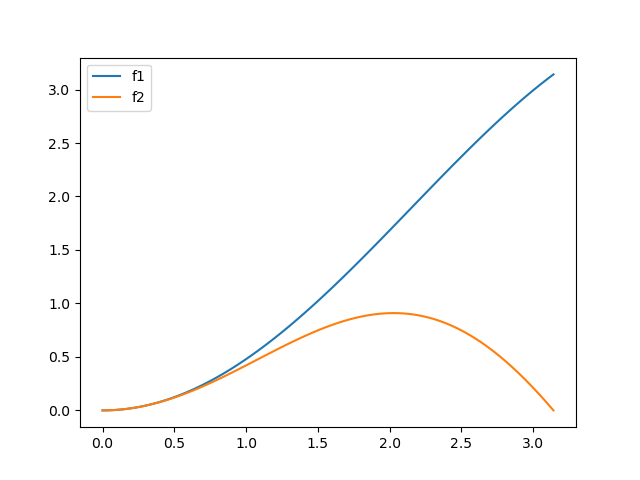

In [224]:
import mpl_interactions.ipyplot as iplt
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, np.pi, 100)
tau = np.linspace(0.5, 10, 100)

def f1(x, tau, beta):
    return np.sin(x * tau) * x * beta
def f2(x, tau, beta):
    return np.sin(x * beta) * x * tau


fig, ax = plt.subplots()
controls = iplt.plot(x, f1, tau=tau, beta=(1, 10, 100), label="f1")
iplt.plot(x, f2, controls=controls, label="f2")
_ = plt.legend()
plt.show()

### categoricals https://mpl-interactions.readthedocs.io/en/stable/examples/usage.html#categoricals

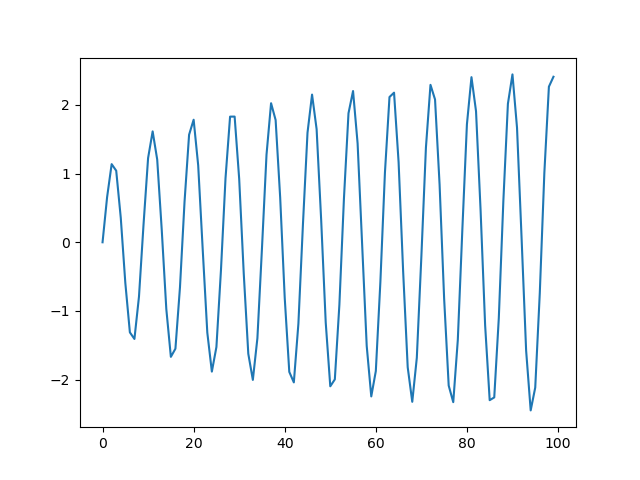

In [90]:
import ipywidgets as widgets


def f(x, tau, beta, type_):
    if type_ == "sin":
        return np.sin(x * tau) * x**beta
    elif type_ == "cos":
        return np.cos(x * tau) * x**beta
    
tau = widgets.FloatText(value=7, step=0.1)

tau = widgets.IntSlider(
    value=7,
    min=0,
    max=10,
    step=1,
    description='Test:',
    # disabled=False,
    # continuous_update=False,
    orientation='horizontal',
    # readout=True,
    # slider_color='black'
)

fig, ax = plt.subplots()
controls = iplt.plot(x, f, tau=tau, beta=(0.2, 1), type_={("sin", "cos")})

### DatePicker

In [40]:
slider = widgets.DatePicker(
    description='Datum',  # Description shown next to the widget
    disabled=False,               # Set to True to disable the widget
    value=None                     # Set an initial date (optional)
)

# Display the slider
display(slider)

# Define an event handler for slider changes
def on_slider_change(change):
    print(f"Slider value: {change['new']}")

slider.observe(on_slider_change, names='value')

DatePicker(value=None, description='Datum')

Slider value: 2023-10-25
Slider value: 2023-12-12


# Test

In [1]:
from IPython.display import display, HTML
# display(HTML("<style>.container { width:95% !important; }</style>"))

from plv.data import load_verbraucherpreisindex, max_inflation, corona_begin
from plv.plot import plot_ts, plot_seasonality, plot_is_oos_forecast

inflation = load_verbraucherpreisindex(filter_columns=["inflation"])

In [2]:
from plv.model import CrisisDummy, AR1
print(corona_begin)
print(max_inflation)
dummy = CrisisDummy(start=corona_begin, end=max_inflation)

2020-01-01
2023-02-01


In [3]:
ar = AR1()

In [26]:
# %debug

In [17]:
import pandas as pd
from matplotlib.figure import Figure
import matplotlib.pyplot as plt
import statsmodels.api as sm
import ipywidgets
from ipywidgets import interact

from plv.model import AR1, CrisisDummy

AR = AR1

import numpy as np

widgets = ipywidgets

class InteractiveForecastPlot:
    def get_data(self, forecast_origin, dummy=False) -> dict:
        data = {}
        data["in_sample"] = self.y.loc[:forecast_origin].copy()  # this is ts
        # Fitting is very fast
        if not dummy:
            self.ar.fit(data["in_sample"])
        else:
            self.ar.fit(data["in_sample"], self.dummy)

        data["forecast"] = self.ar.oos_forecast(self.forecast_horizon)
        
        num = 2
        vertical = np.linspace(*self.ylim, num=num)
        data["forecast_origin"] = pd.Series(vertical, index=[data["in_sample"].index[-1]] * num)
        
        data["corona_start"] = pd.Series(vertical, index=[pd.Timestamp(corona_begin)] * num)
        
        data["in_sample_forecast"] = data["forecast"].loc[:data["in_sample"].index[-1]]
        data["oos_forecast"] = data["forecast"].loc[
        # Use data["in_sample"].index[-2] for a nicer plot
            data["in_sample"].index[-2] + pd.DateOffset(months=1):
        ]

        data["mean"] = self.ar.get_mean(
            data["forecast"].index[0].strftime("%Y-%m-%d"),
            data["forecast"].index[-1].strftime("%Y-%m-%d")
        )
        return data
    
    def setup_ax(self, figsize, ylim):
        fig, ax = plt.subplots(figsize=figsize)
        ax.set_ylim(*ylim)
        ax.set_xlim(self.y.index[0], pd.Timestamp("2049-12-01"))
        # Add labels and a legend
        ax.set_xlabel('Jahre')
        ax.set_ylabel('Inflationsrate')
        ax.set_title('Vergleich von in-sample und out-of-sample Vorhersagen')
    
        return fig, ax
    
    def plot_initial_lines(self, ax, data) -> dict:
        line = {}

        # Plot
        line["in_sample"], = ax.plot(data["in_sample"].index, data["in_sample"],
                                     label="Daten", marker="x") # , markersize=4)
        # , linestyle="", marker="x")

        line["forecast_origin"],  = ax.plot(
            data["forecast_origin"].index, data["forecast_origin"],
            color="black", linestyle='-',
            label='In-sample Ende'
        )
        

        line["in_sample_forecast"], = ax.plot(
            data["in_sample_forecast"].index, data["in_sample_forecast"],
            color=(0, 1, 0), linestyle='-',
            label='In-sample Einschritt-Prognose'
        )

        line["oos_forecast"], = ax.plot(
            data["oos_forecast"].index, data["oos_forecast"], color='red',
            linestyle='--',
            label='Out-of-sample Mehrschritt-Prognose'
        )
        
        line["corona_start"],  = ax.plot(
            data["corona_start"].index, data["corona_start"],
            color="yellow", linestyle='--',
            label='Corona Start'
        )

        line["mean"], = ax.plot([], [], color='gray', linestyle='--',
                                label="Erwartungswert des AR(1) Modells")
        
        return line

    def __init__(
            self,
            ar: AR,
            y: pd.Series,
            dummy: CrisisDummy,
            forecast_horizon: int,
            initial_forecast_origin = "2005",
            figsize = (12,6),
            ylim = (-3, 11)
            ):

        self.ar = ar
        self.y = y
        self.dummy = dummy
        self.forecast_horizon = forecast_horizon
        self.figsize = figsize
        self.ylim = ylim
        self.initial_forecast_origin = initial_forecast_origin
        
    def plot(self):

        # Compute data
        data = self.get_data(self.initial_forecast_origin, dummy=False)

        # set up figure
        fig, ax = self.setup_ax(figsize=self.figsize, ylim=self.ylim)
        
        # fig.canvas.footer_visible = False  # x/y not shown

        line = self.plot_initial_lines(ax, data)
        
        ax.legend(loc='upper left') # , bbox_to_anchor=(1, 0.5))

        # Ensure there is enough space on the right for the legend
        # plt.tight_layout()

        ax.grid(True, linewidth=0.5) 

        widget = {}
        # initial_year and initial_month
        try:
            initial_year, initial_month = self.initial_forecast_origin.split("-")
        except ValueError:
            initial_year, initial_month = self.initial_forecast_origin, "01"
        initial_year, initial_month = int(initial_year), int(initial_month)

        widget["year"] = ipywidgets.IntSlider(min=initial_year, max=2024, step=1)
        widget["month"] =  ipywidgets.IntSlider(min=initial_month, max=12*4, step=1)
        widget["dummy"] = widgets.Dropdown(
            options={'AR(1)': False, 'AR(1) mit Krisen Dummy': True},
            value=False,
            description='Modell:',
        )

        widget["mean"] = widgets.Dropdown(
            options={'Ja': True, 'Nein': False},
            value=False,
            description='Erwartungswert des AR(1) Modells',
        )

        @interact(Jahr=widget["year"], Monat=widget["month"], dummy=widget["dummy"], plot_mean=widget["mean"])
        def update(Jahr: int, Monat: int, dummy: bool, plot_mean: bool):
            
            forecast_origin = f"{Jahr}-{Monat}"
            forecast_origin = pd.Timestamp(f"{Jahr}-01-01") + pd.DateOffset(months=Monat-1)
            data = self.get_data(forecast_origin, dummy)
            for key in line.keys():
                if key == "mean":
                    if not plot_mean:
                        # continue
                        line[key].set_data([], [])
                        continue
                line[key].set_data(data[key].index, data[key])
                # if (key == "in_sample_forecast") and (forecast_origin == pd.Timestamp("2020-01-01")):
                #    print(data[key].tail())
  
            # Request a widget redraw.
            fig.canvas.draw_idle()


interactive(children=(IntSlider(value=2005, description='Jahr', max=2024, min=2005), IntSlider(value=1, descri…

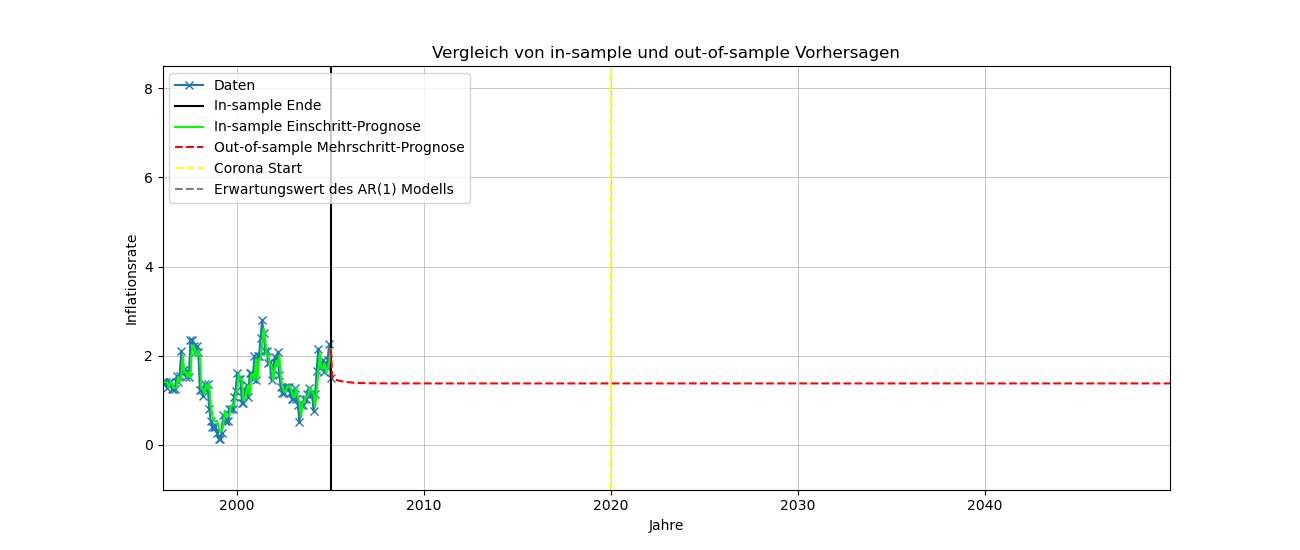

In [18]:
%matplotlib ipympl
a = InteractiveForecastPlot(ar, inflation, dummy, 750, figsize=(13, 5.5), ylim=(-1, 8.5))
a.plot()

In [234]:
import ipywidgets as widgets
from ipywidgets import interact
from IPython.display import display

# Define a function that takes widget parameters as arguments
@interact(value=widgets.FloatSlider(value=0.5, min=0, max=1, step=0.1, description='Slider'))
def update_plot(value):
    # Replace this with your plot update logic based on the value
    print(f"Slider value selected: {value}")

# Optionally, create additional widgets
button = widgets.Button(description='Click Me')
checkbox = widgets.Checkbox(value=False, description='Checkbox')

# Create an HBox to arrange the widgets horizontally
hbox = widgets.HBox([button, checkbox])

# Display the HBox
display(hbox)



interactive(children=(FloatSlider(value=0.5, description='Slider', max=1.0), Output()), _dom_classes=('widget-…

In [231]:
import ipywidgets as widgets
from IPython.display import display

# Create some widgets
button1 = widgets.Button(description='Button 1')
button2 = widgets.Button(description='Button 2')
slider = widgets.FloatSlider(value=0.5, min=0, max=1, step=0.1, description='Slider')

# Create a VBox to arrange the widgets vertically
vbox = widgets.HBox([button1, button2, slider])

# Display the VBox
# display(vbox)


In [125]:
%debug

> /home/spa0001f/mambaforge_new/envs/test_interactive/lib/python3.11/site-packages/dateutil/relativedelta.py(173)__init__()
    171             # Check for non-integer values in integer-only quantities
    172             if any(x is not None and x != int(x) for x in (years, months)):
--> 173                 raise ValueError("Non-integer years and months are "
    174                                  "ambiguous and not currently supported.")
    175 

ipdb> u
> /home/spa0001f/git_repos/teach/plv_1/pandas/_libs/tslibs/offsets.pyx(327)pandas._libs.tslibs.offsets._determine_offset()

ipdb> u
> /home/spa0001f/git_repos/teach/plv_1/pandas/_libs/tslibs/offsets.pyx(1235)pandas._libs.tslibs.offsets.RelativeDeltaOffset.__init__()

ipdb> u
> /tmp/ipykernel_17739/1588329114.py(152)update()
    150 
    151             forecast_origin = f"{Jahr}-{Monat}"
--> 152             forecast_orign = pd.Timestamp(f"{Jahr}-01-01") + pd.DateOffset(months=str(Monat))
    153             data = self.get_data(fo

In [147]:
a.get_data("2000").keys()

dict_keys(['in_sample', 'forecast', 'forecast_origin', 'corona_start', 'in_sample_forecast', 'oos_forecast', 'mean'])

In [160]:
a.get_data("2020-01")["forecast_origin"]

2020-01-01    -3.0
2020-01-01    11.0
dtype: float64

In [185]:
a.get_data("2020-01", dummy=True)["in_sample"].tail()

2019-09-01    1.212121
2019-10-01     1.10999
2019-11-01    1.015228
2019-12-01    1.522843
2020-01-01    2.149437
Freq: MS, Name: inflation, dtype: Float64

In [184]:
a.get_data("2020-01", dummy=True)["in_sample_forecast"].tail()

2019-09-01    1.417498
2019-10-01    1.232432
2019-11-01    1.140178
2019-12-01    1.054582
2020-01-01    2.149437
Freq: MS, dtype: float64

In [153]:
a.get_data("2020-01")["oos_forecast"].head()

2020-01-01    1.515362
2020-02-01    2.081666
2020-03-01    2.020415
2020-04-01    1.965058
2020-05-01    1.915028
Freq: MS, dtype: float64

In [186]:
a.get_data("2020-01", dummy=True)["mean"].loc["2020-01":"2021"]

2020-01-01    8.001284
2020-02-01    8.001284
2020-03-01    8.001284
2020-04-01    8.001284
2020-05-01    8.001284
2020-06-01    8.001284
2020-07-01    8.001284
2020-08-01    8.001284
2020-09-01    8.001284
2020-10-01    8.001284
2020-11-01    8.001284
2020-12-01    8.001284
2021-01-01    8.001284
2021-02-01    8.001284
2021-03-01    8.001284
2021-04-01    8.001284
2021-05-01    8.001284
2021-06-01    8.001284
2021-07-01    8.001284
2021-08-01    8.001284
2021-09-01    8.001284
2021-10-01    8.001284
2021-11-01    8.001284
2021-12-01    8.001284
Freq: MS, dtype: float64